<a href="https://colab.research.google.com/github/jgumin/jupyter-notebook/blob/master/bike-sharing-demand-rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-rf.ipynb
2. https://www.youtube.com/watch?v=Q_MbN-vu_2w
3. https://www.youtube.com/watch?v=95fCw-n5uWM
4. https://www.youtube.com/watch?v=g7EwIFXJntc
5. https://www.youtube.com/watch?v=woSEc5d_skE


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [0]:
pip install plotly==4.1.1

In [0]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline
# %matplotlib nbagg
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = [10, 6]


# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# #  display two pandas tables side by side
# from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))


# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# allow multiple outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# allow image input
from IPython.display import Image

In [0]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
# %config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Image('https://i.stack.imgur.com/ScJfR.png')


# Library Importing(plotly 4.1.1)

In [4]:
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Jupyter setup
# init_notebook_mode(connected=True)

import ipywidgets as widgets

4.1.1


In [0]:
import plotly
from plotly import tools

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Library Importing(plotly 3.6.1)

In [0]:
from plotly import __version__
print (__version__)
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# Jupyter setup
init_notebook_mode(connected=True)

import ipywidgets as widgets

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# plotly 테마 설정

theming 참고1: https://medium.com/plotly/introducing-plotly-py-theming-b644109ac9c7<br>
theming 참고2: https://nbviewer.jupyter.org/github/jonmmease/plotly.py_release_notebooks/blob/master/notebooks/v3.4.0/templates-gapminder.ipynb <br>
기본theme설정/해제 참고: https://plot.ly/python/templates/#specifying-a-default-themes 

In [0]:
import plotly.io as pio
pio.templates.default = "seaborn" # ['ggplot2', 'seaborn', 'plotly','plotly_white', 'plotly_dark','presentation', 'xgridoff', 'none']

# fig = go.Figure(layout={
#     'title' : 'Figure Title',
#     'font' : {'size': 15, 'family': 'Courier'}
# })

# templated_fig = pio.to_templated(fig)
# pio.templates['large_courier'] = templated_fig.layout.template

# pio.templates.default = 'large_courier'

In [7]:
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [8]:
test = pd.read_csv("/content/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [9]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [10]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

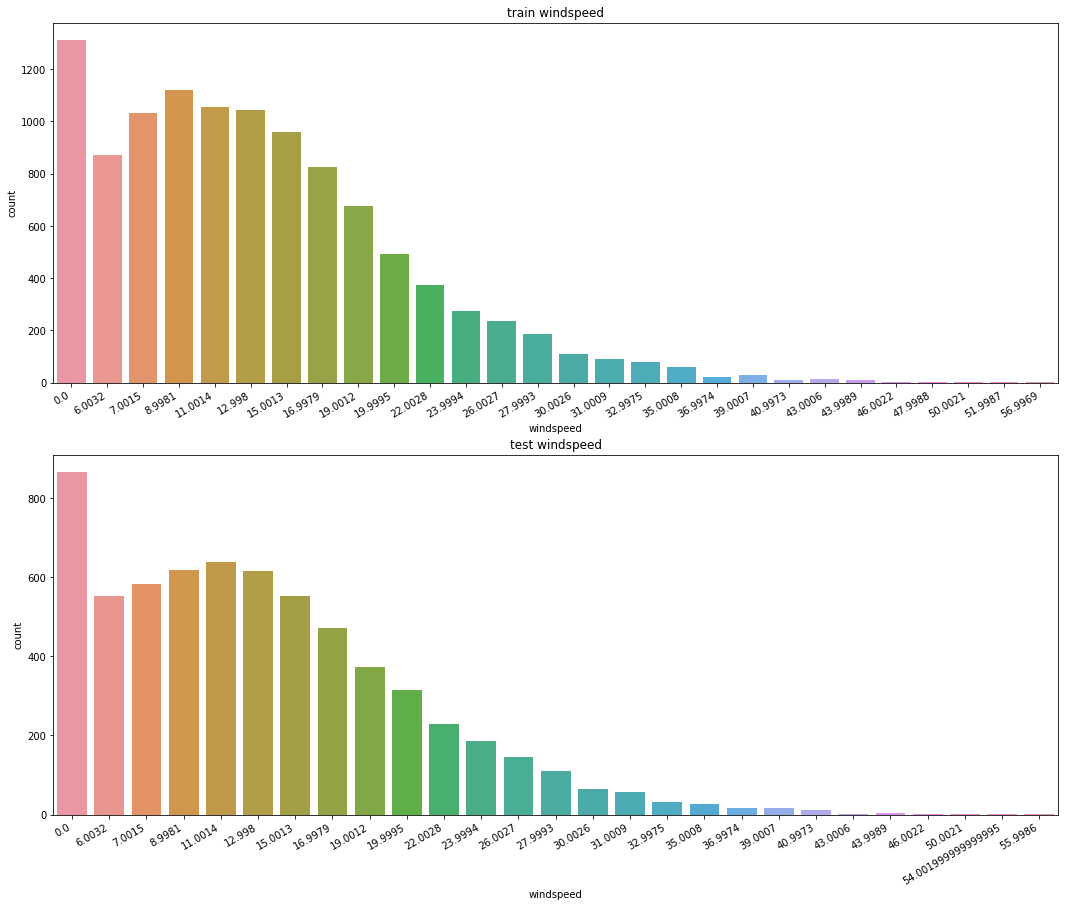

In [11]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)
plt.subplots_adjust(bottom=0.1, top=1.2)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x='windspeed', ax=axes[1])

In [12]:
fig = make_subplots(rows=2, vertical_spacing=0.2,
                    subplot_titles=['Train Windspeed', 'Test Windspeed'])

fig.add_trace(go.Bar(textposition='auto', text=train['windspeed'].value_counts(),
                     x=train['windspeed'].value_counts().index,
                     y=train['windspeed'].value_counts()),row=1, col=1)

fig.add_trace(go.Bar(text=train['windspeed'].value_counts(),
                     x=test['windspeed'].value_counts().index,
                     y=test['windspeed'].value_counts()), row=2, col=1)

fig.update_traces(marker_color=train['windspeed'], textposition='auto',
                  textfont_size=9.25)

fig.update_xaxes(title="windspeed", tickangle=-30, type="category", 
                 tickmode='array', tickformat=".4f")

fig.update_yaxes(title="Count", dtick=200)

fig.update_layout(showlegend=False, height=1000, width=1200)

In [0]:
# 풍속의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수도 있지만, 예측의 정확도를 높이는 데 도움이 될것 같진 않다.
# train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
# test.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

In [14]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [0]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]

    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    return data

In [0]:
# 0값을 조정한다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화

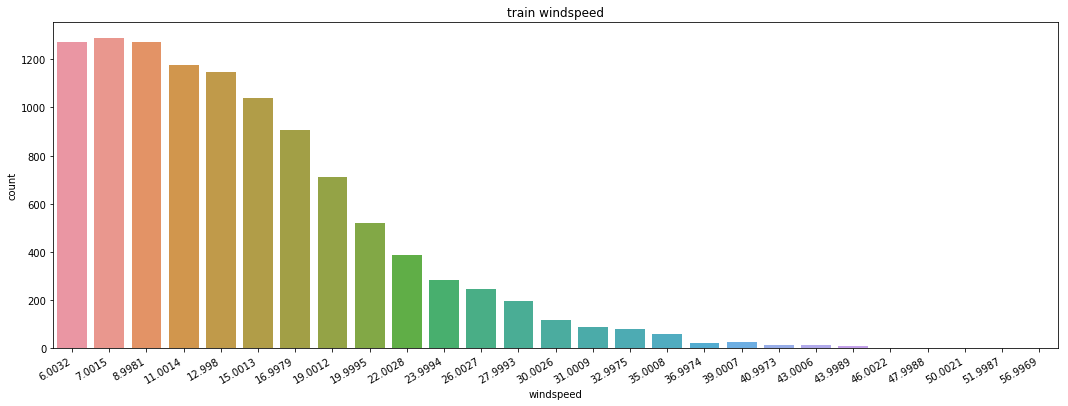

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel="Count", title="train windspeed")
sns.countplot(data=train, x='windspeed', ax=ax1)

## Feature Selection

- 신호와 잡음을 구분해야 한다.
- 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
- 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [0]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
  train[var] = train[var].astype("category")
  test[var] = test[var].astype("category")
  

In [20]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [21]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [22]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [0]:
rom sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer